In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Pune house data.csv")
df1.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'price', 'site_location'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

Data Cleaning: Handle NA values

In [8]:
df2.isnull().sum()

size             16
total_sqft        0
bath             73
price             0
site_location     1
dtype: int64

In [9]:
df3 = df2.dropna()
df3.isnull().sum()

size             0
total_sqft       0
bath             0
price            0
site_location    0
dtype: int64

df3.shape

Feature Engineering

Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [10]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\Users\Shubham Chilhate\AppData\Local\Temp\ipykernel_17828\2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [11]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [12]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,size,total_sqft,bath,price,site_location,bhk
30,4 BHK,2100 - 2850,4.0,186.000,Gultekdi,4
122,4 BHK,3067 - 8156,4.0,477.000,Ganeshkhind,4
137,2 BHK,1042 - 1105,2.0,54.005,Khadaki,2
165,2 BHK,1145 - 1340,2.0,43.490,Prabhat Road,2
188,2 BHK,1015 - 1540,2.0,56.800,Wakadewadi,2
410,1 BHK,34.46Sq. Meter,1.0,18.500,Ganeshkhind,1
549,2 BHK,1195 - 1440,2.0,63.770,Prabhat Road,2
648,9 Bedroom,4125Perch,9.0,265.000,Raviwar Peth,9
661,2 BHK,1120 - 1145,2.0,48.130,Tilak Road,2
672,4 Bedroom,3090 - 5002,4.0,445.000,Alandi Road,4


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [13]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [14]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,size,total_sqft,bath,price,site_location,bhk
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4


In [15]:
df4.loc[30]

size                4 BHK
total_sqft         2475.0
bath                  4.0
price               186.0
site_location    Gultekdi
bhk                     4
Name: 30, dtype: object

Add new feature called price per square feet

In [16]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,Aundh,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2,4250.000000


In [17]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920878e+03
std      1.067272e+05
min      2.678298e+02
25%      4.268165e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [18]:
df5.to_csv("bhp.csv",index=False)

Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [19]:
df5.site_location = df5.site_location.apply(lambda x: x.strip())
location_stats = df5['site_location'].value_counts(ascending=False)
location_stats

Kasba Peth         139
Bibvewadi          139
Laxmi Road         139
Ambegaon Budruk    139
Nana Peth          139
                  ... 
Fatima Nagar       135
Model colony       135
Wakadewadi         134
Vadgaon Budruk     133
other                1
Name: site_location, Length: 97, dtype: int64

In [20]:
location_stats.values.sum()

13200

In [21]:
len(location_stats[location_stats>10])

96

In [22]:
len(location_stats)

97

In [23]:
len(location_stats[location_stats<=10])

1

Dimensionality Reduction

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [24]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

other    1
Name: site_location, dtype: int64

In [26]:
len(df5.location.unique())

AttributeError: 'DataFrame' object has no attribute 'location'

In [27]:
df5.site_location = df5.site_location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.site_location.unique())

97

df5.head(10)

Outlier Removal Using Business Logic

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [28]:
df5[df5.total_sqft/df5.bhk<300].head()

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
9,6 Bedroom,1020.0,6.0,370.0,Bhavani Peth,6,36274.509804
45,8 Bedroom,600.0,9.0,200.0,Kondhwa Budruk,8,33333.333333
58,6 Bedroom,1407.0,4.0,150.0,Mundhawa,6,10660.980810
68,8 Bedroom,1350.0,7.0,85.0,Pirangut,8,6296.296296
70,3 Bedroom,500.0,3.0,100.0,Pune Railway Station,3,20000.000000


In [29]:
df5.shape


(13200, 7)

In [30]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

Outlier Removal Using Standard Deviation and Mean

In [31]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.628922
std        4168.075333
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10883, 7)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

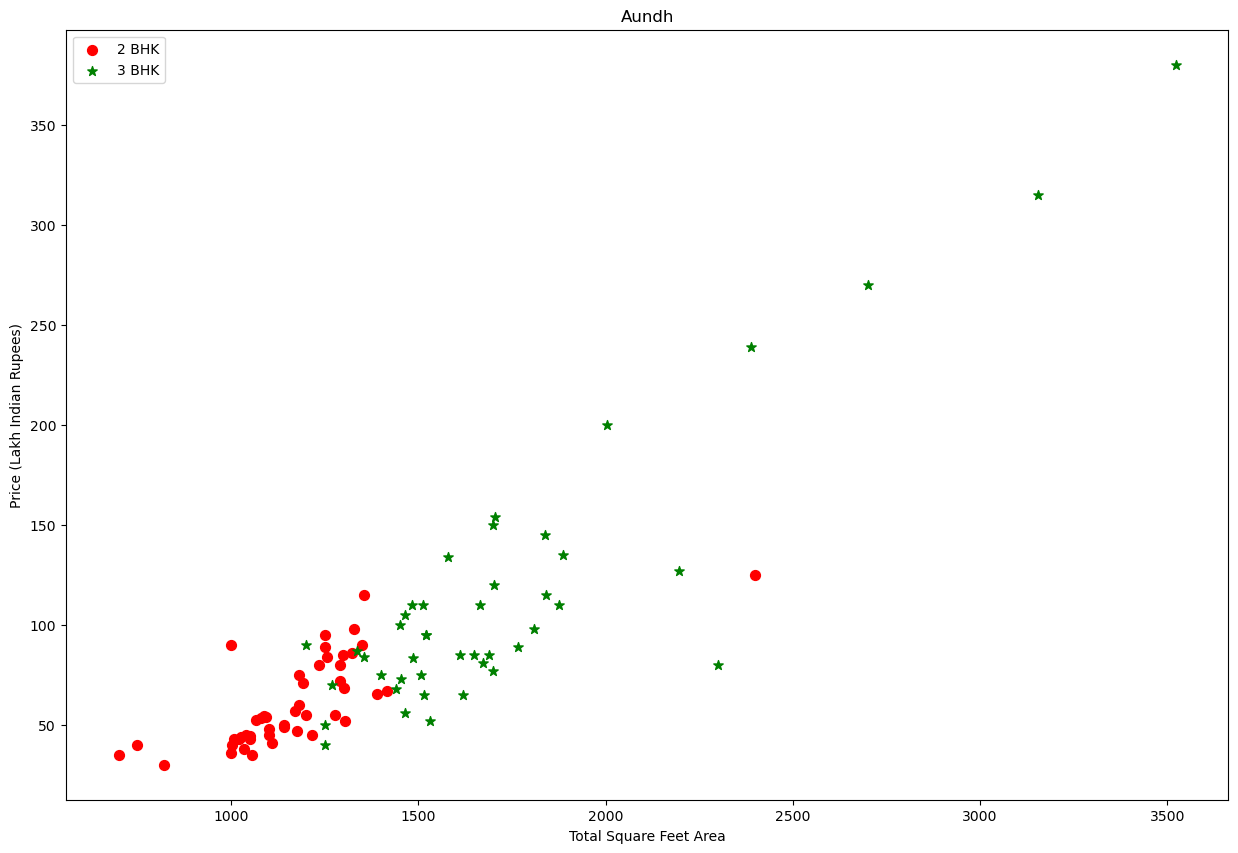

In [33]:
def plot_scatter_chart(df,site_location):
    bhk2 = df[(df.site_location==site_location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==site_location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='red',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(site_location)
    plt.legend()
    
plot_scatter_chart(df7,"Aundh")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [34]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for site_location, site_location_df in df.groupby('site_location'):
        bhk_stats = {}
        for bhk, bhk_df in site_location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in site_location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7543, 7)

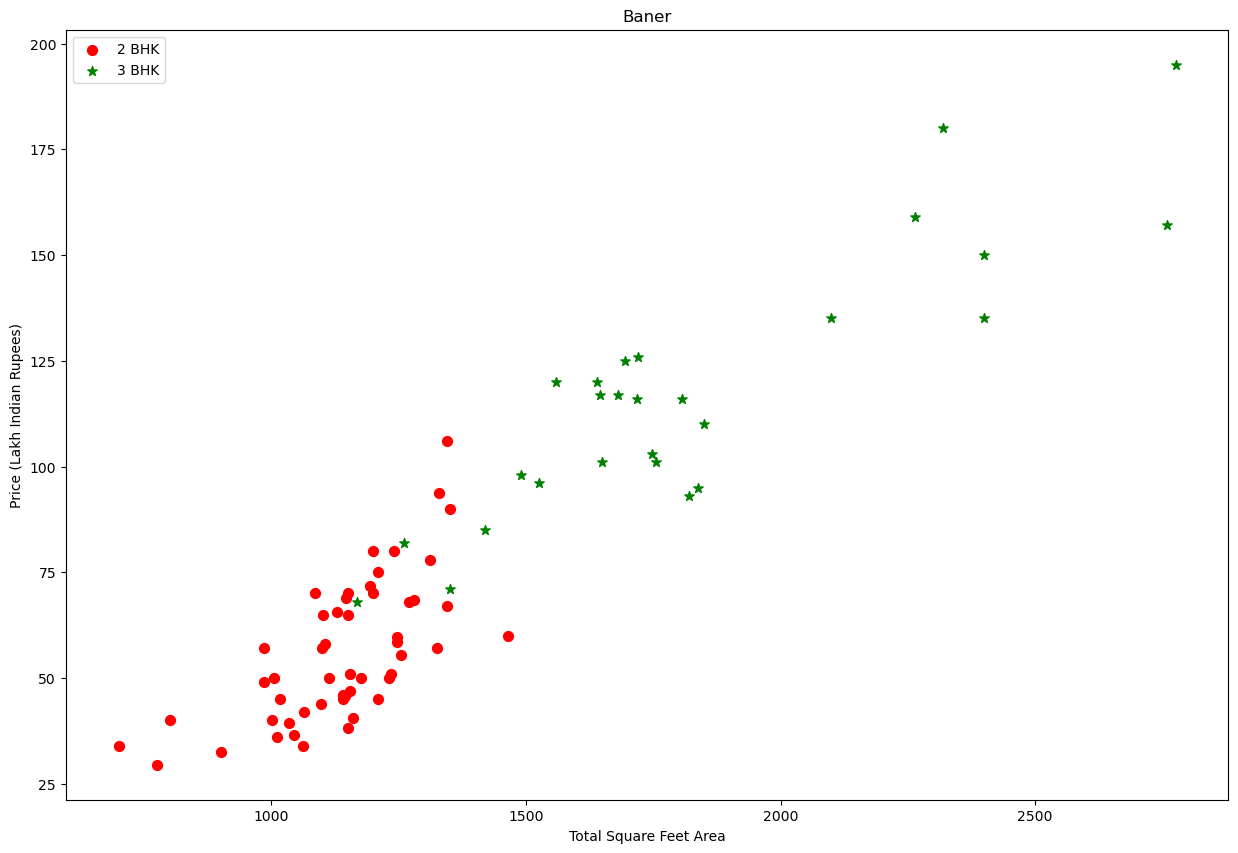

In [35]:
plot_scatter_chart(df8,"Baner")

Text(0, 0.5, 'Count')

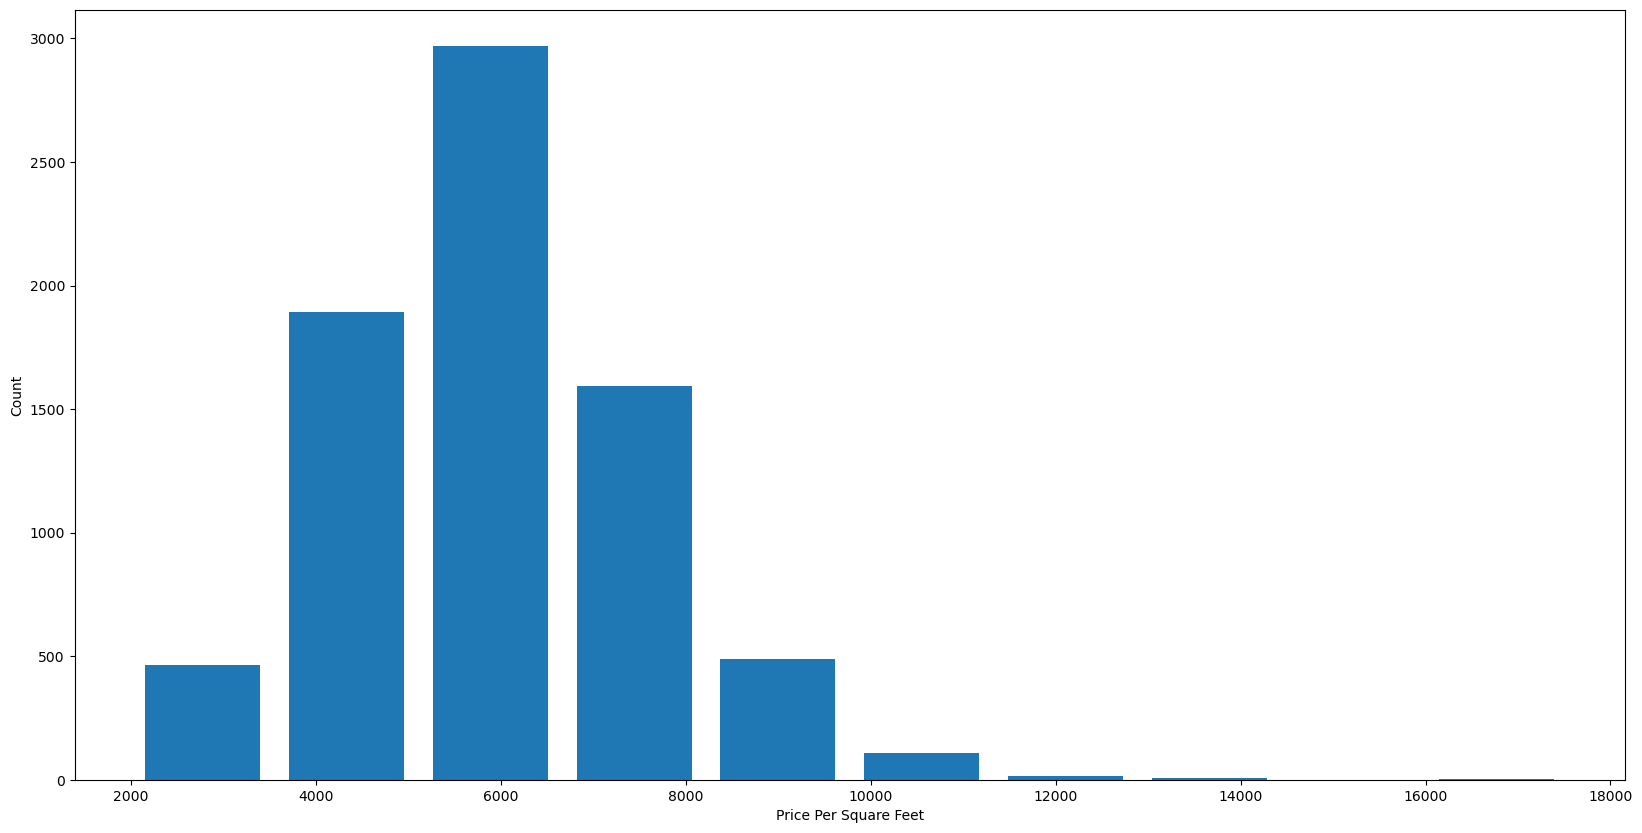

In [36]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Outlier Removal Using Bathrooms Feature

In [37]:
df8.bath.unique()

array([ 2.,  4.,  3.,  5.,  9.,  1.,  6.,  7.,  8., 12., 13., 16.])

Text(0, 0.5, 'Count')

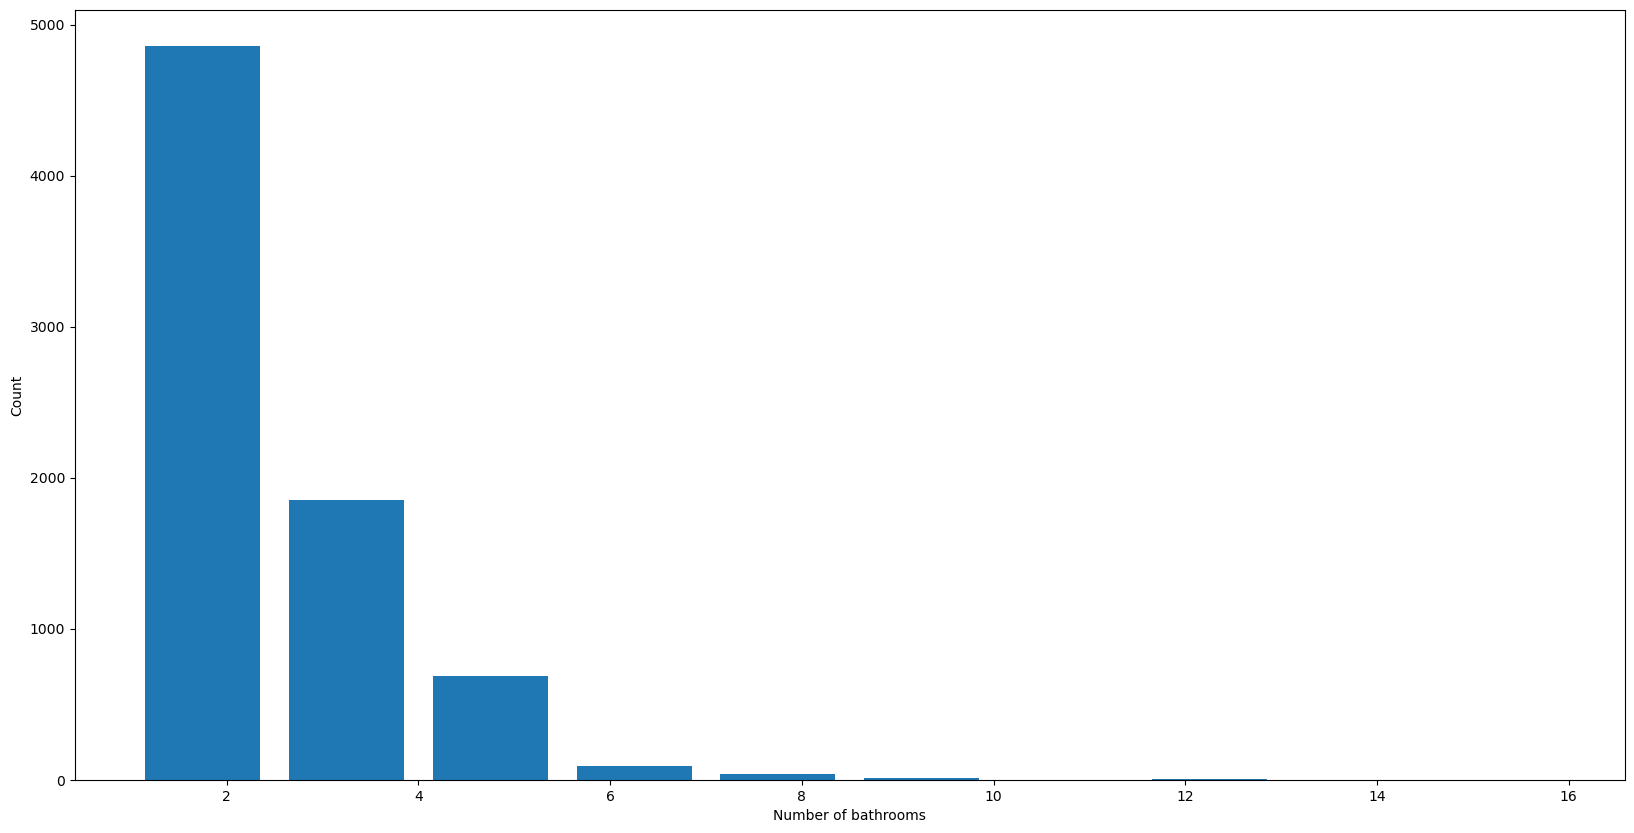

In [38]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [39]:
df8[df8.bath>10]

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
1211,11 BHK,6000.0,12.0,150.0,Bibvewadi,11,2500.000000
2637,10 BHK,12000.0,12.0,525.0,Fatima Nagar,10,4375.000000
5265,13 BHK,5425.0,13.0,275.0,Kondhwa Khurd,13,5069.124424
6350,16 BHK,10000.0,16.0,550.0,Model colony,16,5500.000000
10389,10 BHK,4000.0,12.0,160.0,Wagholi,10,4000.000000


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [40]:
df8[df8.bath>df8.bhk+2]

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
772,3 BHK,1806.0,6.0,116.0,Baner,3,6423.034330
3067,6 BHK,11338.0,9.0,1000.0,Ghorpade Peth,6,8819.897689
4231,4 Bedroom,7000.0,8.0,450.0,Karve Nagar,4,6428.571429


In [41]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7479, 7)

In [42]:
df9.head(2)

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,4 Bedroom,2894.0,4.0,245.00,Alandi Road,4,8465.791292


In [43]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,total_sqft,bath,price,site_location,bhk
0,1056.0,2.0,39.07,Alandi Road,2
1,2894.0,4.0,245.00,Alandi Road,4
2,1084.0,2.0,50.00,Alandi Road,2


Use One Hot Encoding For Location

In [1]:
dummies =pd.get_dummies(df10.site_location)
dummies.head(3)


NameError: name 'pd' is not defined

<!-- df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns') -->
<!-- df11.head(5) -->

In [44]:
df11 = pd.concat([df10,dummies.drop('Warje',axis='columns')],axis='columns')
df11.head()

NameError: name 'dummies' is not defined

In [45]:
df12 = df11.drop('site_location',axis ='columns')
df12.head(4)


NameError: name 'df11' is not defined

In [48]:
df12.shape

(7479, 99)

In [44]:
X = df12.drop('price', axis ='columns')
X.head()

,total_sqft,bath,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Tilak Road,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Yerawada
0,1056.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y =df12.price
y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)


In [61]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=29620f1828ddeda89c71a55d0ff9ad3205d5d4b689e970109f8652eb89f45284
  Stored in directory: c:\users\shubham chilhate\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [64]:
!pip install LinearRegression

In [48]:
from sklearn.linear_model import LinearRegression
lr_clf =LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8234642712561875

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state= 0)

cross_val_score(LinearRegression(),X,y, cv=cv)

array([0.87729294, 0.87158074, 0.82825079, 0.89763339, 0.81068616])

Find best model using GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV 

from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.857089,{'normalize': False}
1,lasso,0.857851,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.794764,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [55]:
X.columns

Index(['total_sqft', 'bath', 'bhk', 'Alandi Road', 'Ambegaon Budruk',
       'Anandnagar', 'Aundh', 'Aundh Road', 'Balaji Nagar', 'Baner',
       'Baner road', 'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar', 'Dapodi',
       'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi', 'Dhayari Phata',
       'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind', 'Ghorpade Peth',
       'Ghorpadi', 'Gokhale Nagar', 'Gultekdi', 'Guruwar peth', 'Hadapsar',
       'Hadapsar Industrial Estate', 'Hingne Khurd', 'Jangali Maharaj Road',
       'Kalyani Nagar', 'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj',
       'Khadaki', 'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk',
       'Kondhwa Khurd', 'Koregaon Park', 'Kothrud', 'Law College Road',
       'Laxmi Road', 'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colony',

In [51]:
def predict_price(site_location, sqft, bath, bhk):
    loc_index = np.where(X.columns==site_location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]


In [52]:
predict_price('Kharadi',1500,3,3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


98.89769908923915

In [62]:
predict_price('Hadapsar',1500,3,3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.09802386976988

In [53]:
import pickle
with open('Pune_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [54]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))